In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-mnist-benchmark/tensorflow2/default/1/mnist_cnn.h5
/kaggle/input/clean-mnist-benchmark-keras/keras/best_model_keras/1/best_model.keras


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

print("TensorFlow:", tf.__version__)

# Create folder to store generated adversarial samples
os.makedirs("FGSM_outputs", exist_ok=True)


2025-11-21 08:05:27.019993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763712327.044085     738 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763712327.051003     738 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

TensorFlow: 2.18.0


In [3]:
# Load your clean pretrained model
model = keras.models.load_model("/kaggle/input/clean-mnist-benchmark/tensorflow2/default/1/mnist_cnn.h5")

print("✓ Loaded clean baseline CNN model")
model.summary()


I0000 00:00:1763712332.333003     738 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763712332.333724     738 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


✓ Loaded clean baseline CNN model


Model: "Improved_MNIST_CNN_V1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_1 (BatchNormalization)      │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_2 (BatchNormalization)      │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_1 (BatchNormalization)      │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_2 (BatchNormalization)      │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense1 (BatchNormalization)  │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense2 (BatchNormalization)  │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense2 (Dropout)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,29

 Total params: 1,929,836 (7.36 MB)

 Trainable params: 1,928,170 (7.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

 Optimizer params: 2 (12.00 B)

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_test = x_test.astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1)

y_test_cat = keras.utils.to_categorical(y_test, 10)

print("Test data shape:", x_test.shape)


Test data shape: (10000, 28, 28, 1)


In [5]:
# Install ART if not already installed
!pip install -q adversarial-robustness-toolbox

import numpy as np
import tensorflow as tf
from tensorflow import keras
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
import os, json

os.makedirs("/kaggle/working/FGSM_outputs", exist_ok=True)

# --- Load the model and ensure it is compiled ---
MODEL_PATH = "/kaggle/input/clean-mnist-benchmark-keras/keras/best_model_keras/1/best_model.keras"   # your uploaded model path
model = keras.models.load_model(MODEL_PATH, compile=False)  # load without compile
print("Loaded model; compiling now so ART can compute gradients...")

# Compile with the same loss used in training (most common for MNIST: categorical_crossentropy)
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])

# Wrap model for ART
classifier = KerasClassifier(model=model, clip_values=(0.0, 1.0))

# Prepare a small subset to test
num_samples = 200
x_clean = x_test[:num_samples].astype(np.float32)   # ensure float32
y_clean = y_test[:num_samples]                      # integer labels
y_clean_cat = keras.utils.to_categorical(y_clean, 10)

# Configure FGSM (eps between 0.05 and 0.2 are typical for MNIST)
eps = 0.15
attack = FastGradientMethod(estimator=classifier, eps=eps)

# Generate adversarial examples
print("Generating FGSM adversarial examples (ART)...")
x_adv = attack.generate(x=x_clean, y=y_clean_cat)   # pass one-hot labels

# Save adversarial dataset and metrics
np.save("/kaggle/working/FGSM_outputs/fgsm_adv_art.npy", x_adv)

preds_clean = np.argmax(model.predict(x_clean), axis=1)
preds_adv   = np.argmax(model.predict(x_adv), axis=1)

clean_acc = (preds_clean == y_clean).mean()
adv_acc   = (preds_adv == y_clean).mean()
attack_success_rate = (preds_adv != y_clean).mean()

metrics = {
    "clean_acc": float(clean_acc),
    "adv_acc": float(adv_acc),
    "attack_success_rate": float(attack_success_rate),
    "eps": float(eps),
    "num_samples": int(num_samples)
}
with open("/kaggle/working/FGSM_outputs/fgsm_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("Saved adversarial samples and metrics to FGSM_outputs/")
print(metrics)


Loaded model; compiling now so ART can compute gradients...
Generating FGSM adversarial examples (ART)...


I0000 00:00:1763712339.911651     738 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763712341.842915     789 service.cc:148] XLA service 0x79dd24004650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763712341.842945     789 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763712341.842949     789 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 992ms/step

I0000 00:00:1763712342.571305     789 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Saved adversarial samples and metrics to FGSM_outputs/
{'clean_acc': 1.0, 'adv_acc': 0.675, 'attack_success_rate': 0.325, 'eps': 0.15, 'num_samples': 200}


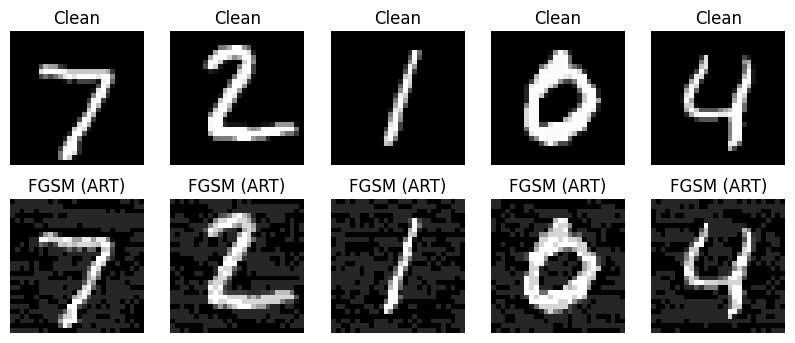

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(10,4))

for i in range(5):
    axs[0, i].imshow(x_clean[i].squeeze(), cmap='gray')
    axs[0, i].set_title("Clean")
    axs[0, i].axis('off')

    axs[1, i].imshow(x_adv[i].squeeze(), cmap='gray')
    axs[1, i].set_title("FGSM (ART)")
    axs[1, i].axis('off')

plt.show()


In [7]:
clean_preds = np.argmax(model.predict(x_clean), axis=1)
clean_acc = np.mean(clean_preds == y_test[:num_samples])

print("Clean Accuracy on subset:", clean_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Clean Accuracy on subset: 1.0


In [8]:
fgsm_preds = np.argmax(model.predict(x_adv), axis=1)
fgsm_acc = np.mean(fgsm_preds == y_test[:num_samples])

print("FGSM Adversarial Accuracy:", fgsm_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
FGSM Adversarial Accuracy: 0.675


In [9]:
import json

metrics = {
    "clean_accuracy": float(clean_acc),
    "fgsm_accuracy": float(fgsm_acc),
    "epsilon": float(eps),
    "samples_used": num_samples
}

with open("/kaggle/working/FGSM_outputs/fgsm_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("✓ Metrics saved to /kaggle/working/FGSM_outputs/fgsm_metrics.json")


✓ Metrics saved to /kaggle/working/FGSM_outputs/fgsm_metrics.json


In [11]:
print("======== FGSM ATTACK SUMMARY ")
print(f"Clean Model Accuracy     : {clean_acc*100:.2f}%")
print(f"FGSM Adversarial Accuracy: {fgsm_acc*100:.2f}%")
print(f"Accuracy Drop            : {(clean_acc - fgsm_acc)*100:.2f}%")
print("FGSM epsilon used        :", eps)



======== FGSM ATTACK SUMMARY 
Clean Model Accuracy     : 100.00%
FGSM Adversarial Accuracy: 67.50%
Accuracy Drop            : 32.50%
FGSM epsilon used        : 0.15


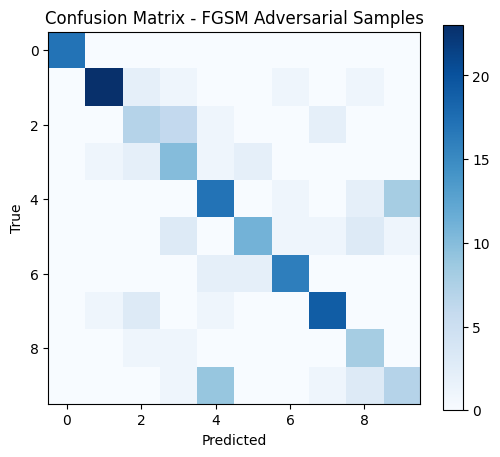

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test[:len(x_adv)], fgsm_preds)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix - FGSM Adversarial Samples")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

np.save("/kaggle/working/FGSM_outputs/confusion_matrix_fgsm.npy", cm)


In [14]:
from sklearn.metrics import classification_report

cr = classification_report(y_test[:len(x_adv)], fgsm_preds, output_dict=False)
print(cr)

with open("/kaggle/working/FGSM_outputs/classification_report_fgsm.txt", "w") as f:
    f.write(cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.82      0.87        28
           2       0.47      0.44      0.45        16
           3       0.45      0.62      0.53        16
           4       0.55      0.61      0.58        28
           5       0.73      0.55      0.63        20
           6       0.84      0.80      0.82        20
           7       0.83      0.79      0.81        24
           8       0.47      0.80      0.59        10
           9       0.44      0.33      0.38        21

    accuracy                           0.68       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.69      0.68      0.68       200



In [16]:
import json

summary = {
    "epsilon": 0.15,
    "clean_accuracy": float(clean_acc),
    "fgsm_accuracy": float(fgsm_acc),
    "accuracy_drop": float(clean_acc - fgsm_acc),
    "num_samples": len(x_adv)
}

with open("/kaggle/working/FGSM_outputs/final_summary.json", "w") as f:
    json.dump(summary, f, indent=4)

print("Summary saved to /kaggle/working/FGSM_outputs/final_summary.json")
print(summary)


Summary saved to /kaggle/working/FGSM_outputs/final_summary.json
{'epsilon': 0.15, 'clean_accuracy': 1.0, 'fgsm_accuracy': 0.675, 'accuracy_drop': 0.32499999999999996, 'num_samples': 200}
